<a href="https://colab.research.google.com/github/ashik25800/Real-Life-Projects/blob/main/ML_lab_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/Churn Modelling .csv')

***1. How much data is available in the given dataset?.***

In [5]:
size = data.size
shape = data.shape

In [70]:

print("There are total ",size," data in the dataset.")
print("There are ",shape[0]," rows and ",shape[1]," columns")

There are total  140000  data in the dataset.
There are  10000  rows and  14  columns


***2. Show the all columns name.***

In [7]:
columns_name = data.columns

In [69]:
print('All columns name: ')
j = 0
for i in columns_name:
  print(j," : ",i)
  j+=1

All columns name: 
0  :  RowNumber
1  :  CustomerId
2  :  Surname
3  :  CreditScore
4  :  Geography
5  :  Gender
6  :  Age
7  :  Tenure
8  :  Balance
9  :  NumOfProducts
10  :  HasCrCard
11  :  IsActiveMember
12  :  EstimatedSalary
13  :  Exited


***3. How many null values are available in the dataset?***

In [9]:
null_values = data.isnull().sum()

In [68]:
print("There are ",null_values.sum()," total null values in the dataset")
print()
print("They are: ")
null_values

There are  21  total null values in the dataset

They are: 


RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                11
Tenure              0
Balance            10
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

***4. Process the null values using your own knowledge (if any).***

# Though I can choose padding or backfilling, but I will choose the row deleting method. That means I will delete the row which contains null values.

In [67]:

data = data.dropna() #droping the null value contains rows
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

***5. Delete the unnecessary columns from the dataset.***

In [12]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3979,3980,15783030,Owens,685,France,Female,40.0,7,0.00,1,1,0,72852.74,1
6164,6165,15608109,Greco,710,Germany,Male,58.0,7,170113.00,2,0,1,10494.64,0
5543,5544,15585777,Pai,710,France,Male,38.0,3,130588.82,1,1,1,154997.64,0
9900,9901,15645896,Duncan,646,Germany,Male,39.0,6,121681.91,2,0,1,61793.47,0
532,533,15663478,Baldwin,729,France,Male,32.0,6,93694.42,1,1,1,79919.13,0


#I think RowNumber, CustomerId and Surname these columns are useless in this dataset. So, Im droping the command.

In [13]:
print("5. Delete the unnecessary columns from the dataset.")
print()
#unnecessary columns are droped with drop method
column_processed = data.drop(['RowNumber','CustomerId','Surname'],axis = 1)
column_processed.head(5)

5. Delete the unnecessary columns from the dataset.



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1


***6. Apply feature scaling in the CreditScore, Balance, EstimatedSalary columns and make a dataframe of this given three columns***

#Feature scaling (MinMax)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
#appling Feature scaling
CreditScore = scaler.fit_transform(data[['CreditScore']])
Balance = scaler.fit_transform(data[['Balance']])
EstimatedSalary = scaler.fit_transform(data[['EstimatedSalary']])

In [16]:
data['CreditScore'] = CreditScore
data['Balance'] = Balance
data['EstimatedSalary'] = EstimatedSalary

#after applying feature scaling

In [17]:
data[['CreditScore','Balance','EstimatedSalary']].sample(5)

,CreditScore,Balance,EstimatedSalary
9387,0.348,0.577429,0.938732
1796,0.410,0.498087,0.300941
3301,0.606,0.473653,0.264068
9404,0.490,0.000000,0.525741
5758,0.662,0.363158,0.120998


***7. Represent Geography column data using pie charts and explode the France geography data in the pie charts.***

In [18]:
geography_values = data['Geography'].value_counts()

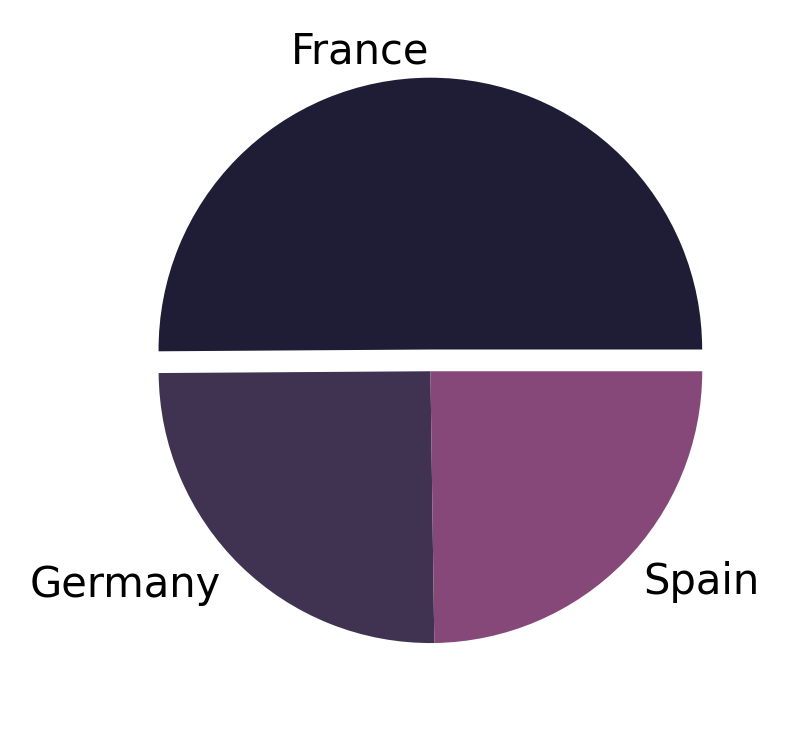

In [19]:
name = geography_values.index
val = geography_values.values

explode = [0.08, 0, 0]
colors = ["#1F1D36","#3F3351","#864879"]


plt.figure(figsize=(3,3),dpi = 300)
plt.pie(val, labels = name, explode = explode,colors = colors, shadow = False)

plt.show()


***8. Represent RowNumber(X-axis) and Age(Y-axis) columns data using scatter plots. If the customers are Exited(1) then set the marker color as red, otherwise green. And set the figure size (20,10) inches.***

In [20]:
#Here x0,y0 contains RowNumber and Age values against when exited 0
# x1 and y1 contains RowNumber and Age values against when exited 1

x0 = []
y0 = []
x1 = []
y1 = []
count = 0
for i, j, k in zip(data['Exited'],data['RowNumber'],data['Age']):
  if i == 1:
    x1.append(j)
    y1.append(k)
  else:
    x0.append(j)
    y0.append(k)
  


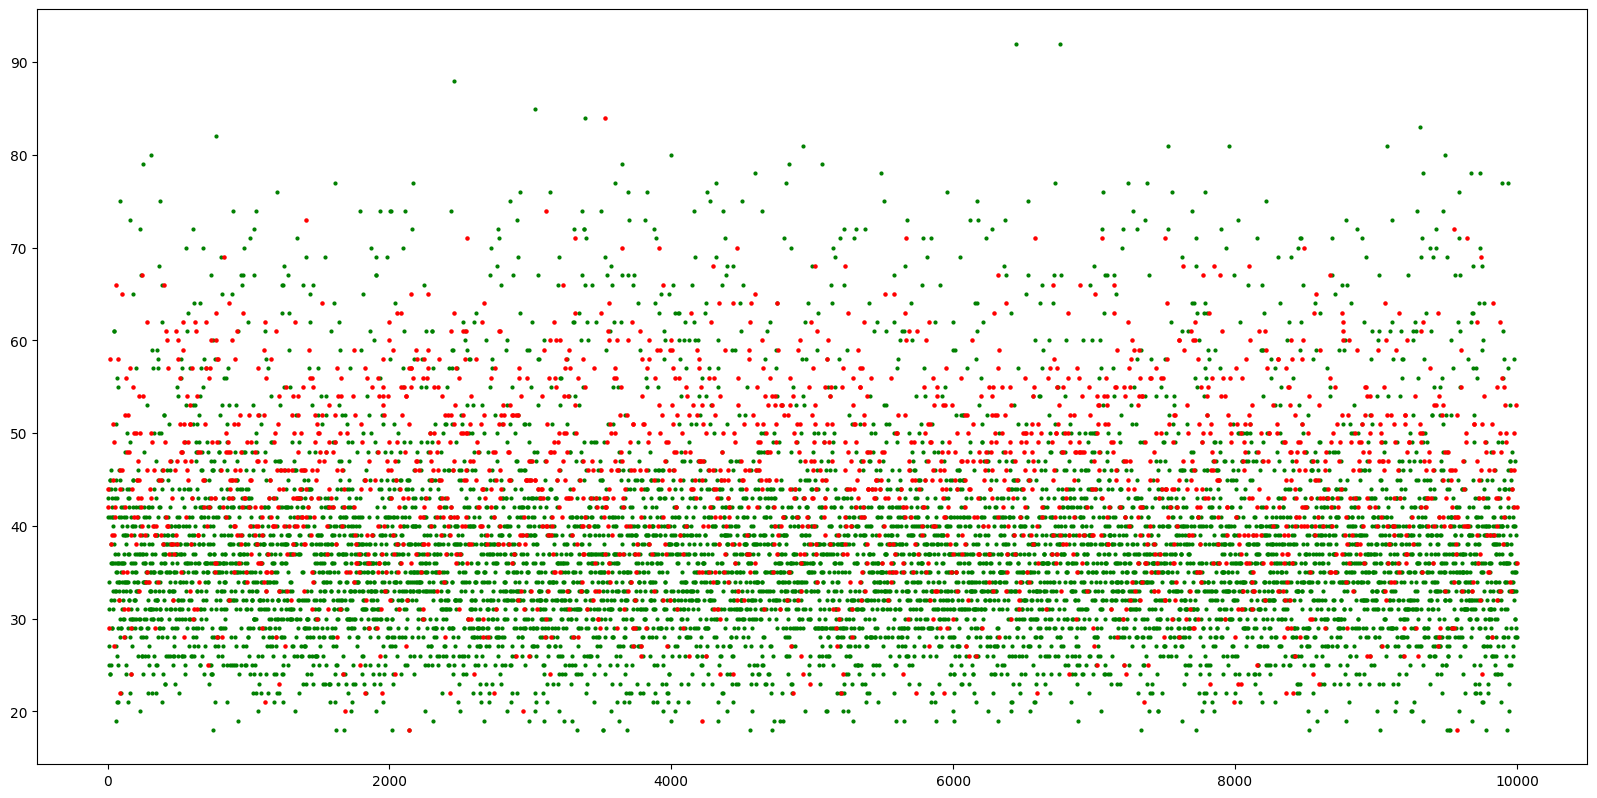

In [21]:

plt.figure(figsize=(20,10),dpi = 100)

plt.scatter(x0,y0,color = 'green',s = 4)
plt.scatter(x1,y1,color = 'red',s = 5)




***9. Apply feature encoding(Label Encoding and One Hot Encoding) in the given dataset using your own knowledge.***

In [22]:
column_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9979 entries, 1 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9979 non-null   int64  
 1   Geography        9979 non-null   object 
 2   Gender           9979 non-null   object 
 3   Age              9979 non-null   float64
 4   Tenure           9979 non-null   int64  
 5   Balance          9979 non-null   float64
 6   NumOfProducts    9979 non-null   int64  
 7   HasCrCard        9979 non-null   int64  
 8   IsActiveMember   9979 non-null   int64  
 9   EstimatedSalary  9979 non-null   float64
 10  Exited           9979 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 935.5+ KB


# Here we can see 'Geography' and 'Gender'  columns are in string format. So , we need to do Label encoding or one hot encoding in these columns.
# we will apply lebel encoding in Geography column and one hot endcoding in Gender columns


**Label Encoding**

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
label_encoder = LabelEncoder()

In [25]:
column_processed['encoded_geography'] = label_encoder.fit_transform(column_processed['Geography'])

In [26]:
column_processed[['Geography','encoded_geography']].head(5)

,Geography,encoded_geography
1,Spain,2
2,France,0
4,Spain,2
5,Spain,2
7,Germany,1


**One hot encoding**

In [27]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
one_hot  = OneHotEncoder(sparse=False)

In [54]:
one_hot_processed = one_hot.fit_transform(column_processed[['Gender']])

In [55]:
one_hot_processed

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [62]:
df = pd.DataFrame(one_hot_processed,columns=['Female','Male'])

In [63]:
column_processed = column_processed.join(df)

#After one hot encoding and joining the dataframe into the main frame

In [65]:
column_processed[['Gender','Female','Male']].head(10)

,Gender,Female,Male
1,Female,1.0,0.0
2,Female,1.0,0.0
4,Female,1.0,0.0
5,Male,0.0,1.0
7,Female,0.0,1.0
8,Male,1.0,0.0
9,Male,1.0,0.0
10,Male,0.0,1.0
12,Female,1.0,0.0
13,Female,0.0,1.0


***colab to pdf***